In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/home/sunbeam/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('universities_std.csv')
df.head()

,Unnamed: 0,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     int64  
 1   SAT         25 non-null     float64
 2   Top10       25 non-null     float64
 3   Accept      25 non-null     float64
 4   SFRatio     25 non-null     float64
 5   Expenses    25 non-null     float64
 6   GradRate    25 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.5 KB


In [4]:
df.describe()

,Unnamed: 0,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,12.000000,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,7.359801,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,12.000000,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,18.000000,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.head()

,Unnamed: 0,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


## Data Pre-processing

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


## Create hierarchical cluster

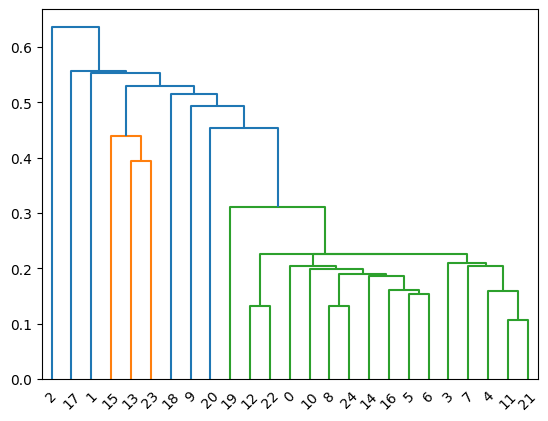

In [7]:
from scipy.cluster import hierarchy
linkage = hierarchy.linkage(df, 'single')
dendo = hierarchy.dendrogram(linkage)

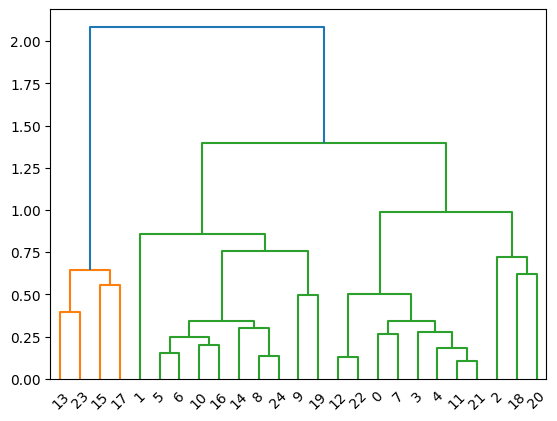

In [8]:
linkage = hierarchy.linkage(df, 'complete')
dendo = hierarchy.dendrogram(linkage)

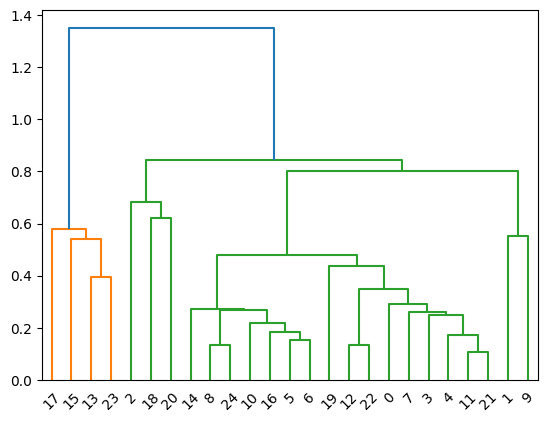

In [9]:
linkage = hierarchy.linkage(df, 'average')
dendo = hierarchy.dendrogram(linkage)

## Use ski-kit Learn

In [10]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, linkage='complete')
model.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=4)

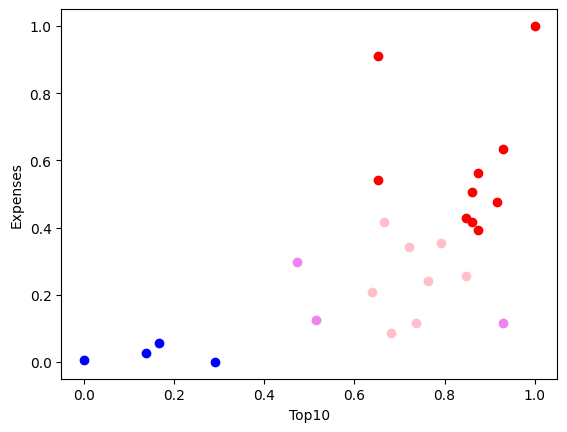

In [11]:
figure = plt.figure()
colors = ['red','blue','violet','pink']
for k in range(len(colors)):
    plt.scatter(df['Top10'][model.labels_==k], df['Expenses'][model.labels_==k], color=colors[k])
    plt.xlabel('Top10')
    plt.ylabel('Expenses')

## create DBSCAN model

In [12]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=8.0, min_samples=4)
model.fit(df)

DBSCAN(eps=8.0, min_samples=4)

In [13]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

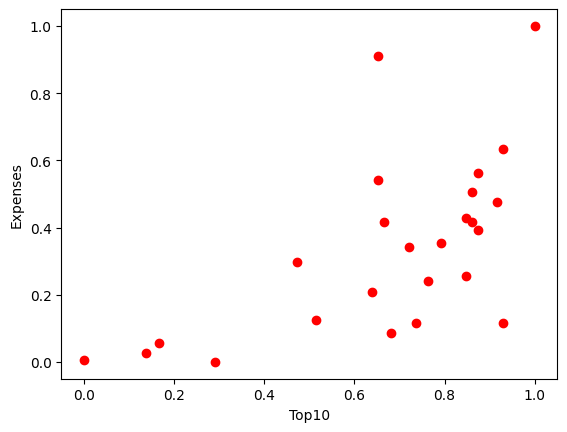

In [14]:
figure = plt.figure()
colors = ['red','green','pink','blue']
for k in range(len(colors)):
    plt.scatter(df['Top10'][model.labels_==k], df['Expenses'][model.labels_==k], color=colors[k])
    plt.xlabel('Top10')
    plt.ylabel('Expenses')